In [1]:
# Packages that will be used
library(lattice)
library(ggplot2)
library(class)
library(caret)
library(ROCR)
library(caTools)
library(dplyr)
library("FactoMineR")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Reading training data
data_train_name <- load("spam_data_train.rda")
data_train <- eval(as.symbol(data_train_name))
print(dim(data_train))
head(data_train, n=5)

[1] 2588   58


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,⋯,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
455,0.0,0.0,0.89,0,1.79,0.44,0.00,0.00,0.00,0.00,⋯,0,0.073,0.000,0.000,0.00,0.000,2.250,12,144,1
2246,0.0,0.0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0,0.000,0.000,0.277,0.00,0.000,3.000,17,51,0
1935,0.0,0.0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0,0.377,0.000,0.125,0.00,0.000,2.925,27,158,0
1384,0.0,0.0,0.00,0,1.82,0.36,0.36,0.72,0.36,0.36,⋯,0,0.297,0.059,0.178,0.00,0.000,2.446,11,115,1
679,0.1,0.1,0.70,0,0.60,0.20,0.40,0.10,1.41,0.80,⋯,0,0.000,0.260,0.991,0.39,0.032,3.173,56,1044,1


In [3]:
#splitting dataset into training and test set
set.seed(101) 
sample = sample.split(data_train, SplitRatio = .8)
train = subset(data_train, sample == TRUE)
test  = subset(data_train, sample == FALSE)

In [4]:
# Separating features and target variables
data_train_x <-train[, 1:57]
data_train_y <-train[,58] 
print(dim(data_train_x))

data_test_x <-test[, 1:57]
data_test_y <-test[,58] 
print(dim(data_test_x))

[1] 2053   57
[1] 535  57


In [5]:
# Calculating the mean and standard deviation of data variables
mean_data_train <- apply(data_train_x,2,mean)
std_data_train <- apply(data_train_x,2,sd)
#stat_data_train <- rbind(mean_data_train,std_data_train)

mean_data_test <- apply(data_test_x,2,mean)
std_data_test <- apply(data_test_x,2,sd)
#stat_data_test <- rbind(mean_data_test,std_data_test)

In [6]:
#Data normalization 
norm_data_train <- sweep(data_train_x, 2, mean_data_train, "-")
norm_data_train <- sweep(norm_data_train, 2, std_data_train, "/")

norm_data_test <- sweep(data_test_x, 2, mean_data_test, "-")
norm_data_test <- sweep(norm_data_test, 2, std_data_test, "/")

In [7]:
#number of neighbors (choosen randomly just for the beginning)
num_of_neigh <- 9
#appying Knn on initial dataset
data_train_predict <- knn(train=data_train_x,test=data_train_x, cl=data_train_y,k=num_of_neigh)

#Error rate on training dataset
error_rate <- mean(data_train_predict != data_train_y)
cat("error_rate using train data = ",error_rate)

error_rate using train data =  0.1782757

In [8]:
#Testing the result of Knn on initial dataset using test data
data_test_predict <- knn(train=data_train_x,test=data_test_x, cl=data_train_y,k=num_of_neigh)

# Error rate on test dataset
error_rate <- mean(data_test_predict != data_test_y)
cat("error_rate using test data = ",error_rate)

error_rate using test data =  0.2373832

In [9]:
#applying Knn on normalized dataset
norm_data_train_predict <- knn(train=norm_data_train,test=norm_data_train, cl=data_train_y,k=num_of_neigh)

# Error rate on training dataset
error_rate <- mean(norm_data_train_predict != data_train_y)
cat("error_rate using train data = ",error_rate)

error_rate using train data =  0.08913785

In [10]:
#Testing the result of knn on normalized dataset using test data
norm_data_test_predict <- knn(train=norm_data_train,test=norm_data_test, cl=data_train_y,k=num_of_neigh)

# Error rate on test dataset
error_rate <- mean(norm_data_test_predict != data_test_y)
cat("error_rate using test data = ",error_rate)

error_rate using test data =  0.09158879

In [11]:
# confusion matrix 
confmat = table(norm_data_test_predict,data_test_y)
print("Confusion Matrix")
print(confmat)
# True positive + True negative + False positive + False negative
TP = confmat[1,1]; TN = confmat[2,2]; FP = confmat[1,2]; FN = confmat[2,1];

[1] "Confusion Matrix"
                      data_test_y
norm_data_test_predict   0   1
                     0 316  34
                     1  15 170


In [12]:
# Sensitivity ; TPR = true positive rate)
TPR = TP/(TP+FN)
cat("TPR",TPR,"\n")
# Specificity ; TNR = true negative rate
TNR = TN/(TN+FP)
cat("TNR",TNR,"\n")
# precision ; positive predictive value
PPV = TP/(TP+FP)
cat("PPV",PPV,"\n")
# comparating prevalence
cat("Prev =",length(data_test_y[data_test_y==1])/length(data_test_y),"\n")

TPR 0.9546828 
TNR 0.8333333 
PPV 0.9028571 
Prev = 0.3813084 


In [13]:
cat("F-score = ",2 * TPR * PPV / (TPR+PPV),"\n")

F-score =  0.928047 


Minimun error : 0.09158879 at K = 11 


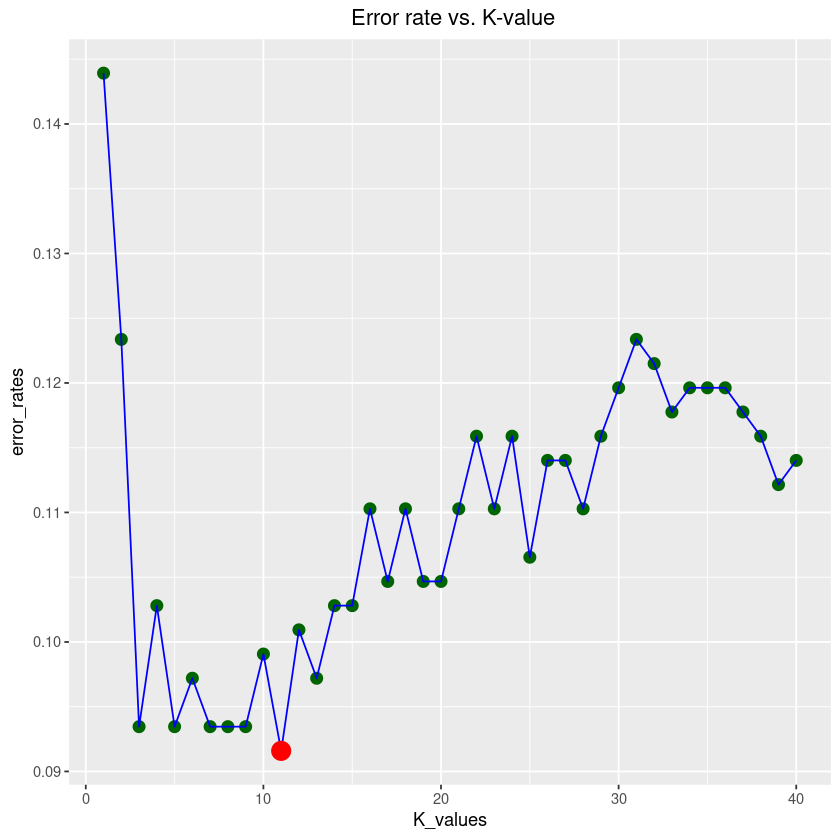

In [14]:
#searching the best K value
error_rates = c()
K_values <- c(1:40)
for(i in 1:length(K_values)){
    norm_data_test_predict <- knn(train=norm_data_train,test=norm_data_test, cl=data_train_y,k=i)
    error_rate <- mean(norm_data_test_predict != data_test_y)
    error_rates[i] <-error_rate
}
data = data.frame(K_values, error_rates)
highlight_min <- data[which.min(data$error_rates),]
cat("Minimun error :",highlight_min$error_rates,"at K =",highlight_min$K_values,"\n")

ggplot(data) + aes(x = K_values, y = error_rates)+geom_point(color = "darkgreen", size = 3)+
geom_line(color="blue")+ geom_point(data=highlight_min, aes(x=K_values,y=error_rates),
color='red', size=5)+labs(title = " Error rate vs. K-value")+theme(plot.title = element_text(hjust = 0.5))


In [15]:
# k nearst neighbors using probabilities
num_of_neigh = 11
data_test_predict_with_proba <- knn(train=norm_data_train,test=norm_data_test,
                                    cl=data_train_y,k= num_of_neigh,prob=TRUE)
# computing score
score <- attr(data_test_predict_with_proba, "prob")
score <- ifelse(data_test_predict_with_proba == "0", 1-score, score)

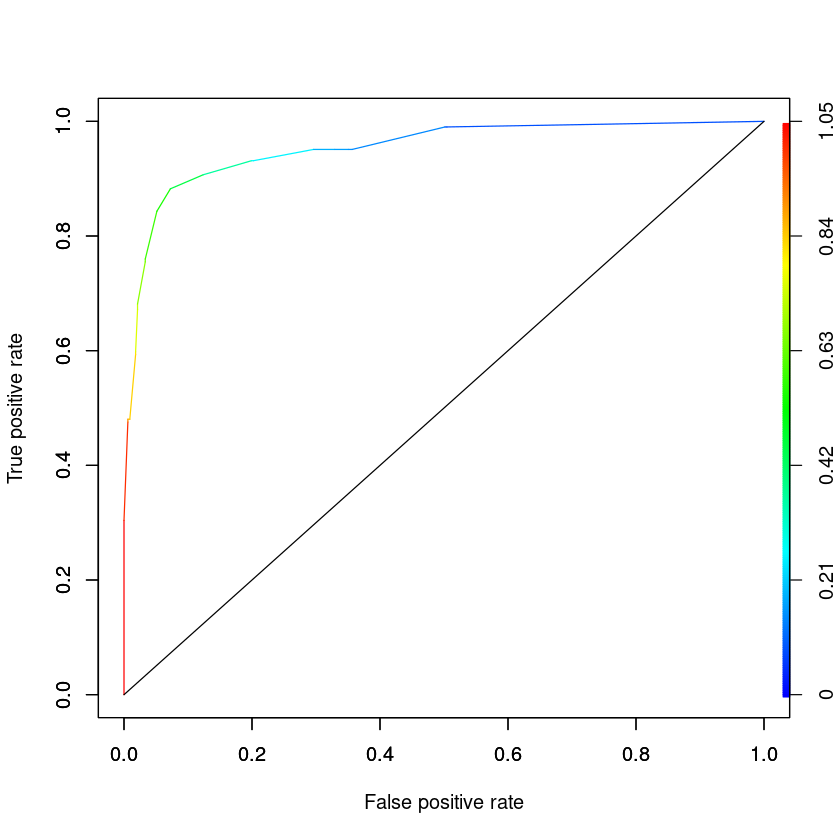

In [16]:
#Model evaluation using ROC curve 
pred_knn <- prediction(score, data_test_y)
perf <- performance(pred_knn, "tpr", "fpr")
plot(perf,colorize=TRUE)
par(new=T)
plot(c(0,1),c(0,1),type="l",ann=FALSE)

In [17]:
#Computing the area under the curve (AUC criteria)
AUC <- performance(pred_knn, "auc")@y.values[[1]]
cat("AUC = ", AUC)

AUC =  0.9526094

Meilleur seuil  0.4

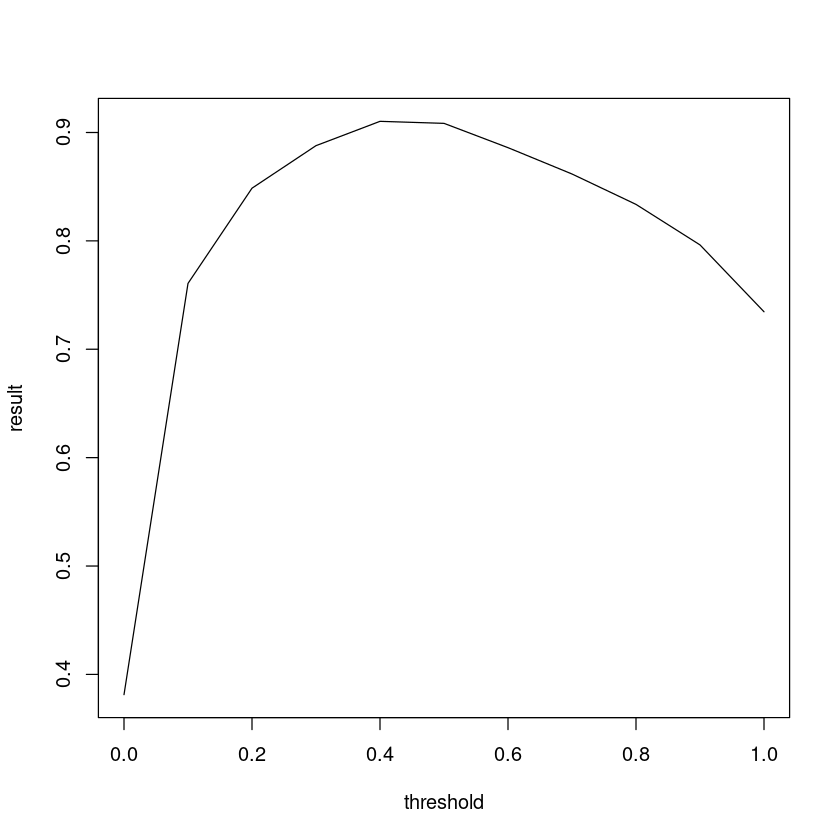

In [18]:
#choice of threshold
result <- NULL
threshold <- seq(0,1,len=11)
for (s in threshold)
{
test <- as.integer(score>=s)
result <- c(result,1-mean(test != data_test_y))
}
plot(threshold,result,type="l")
cat("Meilleur seuil ", threshold[which.max(result)])

In [19]:
# Reading new dataset without target
data_test_name <- load("spam_data_test.rda")
new_data_test <- eval(as.symbol(data_test_name))

In [20]:
#Normalization 
new_mean_data_test <- apply(new_data_test,2,mean)
new_std_data_test <- apply(new_data_test,2,sd)

norm_new_data_test <- sweep(new_data_test, 2, new_mean_data_test, "-")
norm_new_data_test <- sweep(norm_new_data_test, 2, new_std_data_test, "/")

In [21]:
#Prediction
new_data_test_predict <- knn(train=data_train_x,test=norm_new_data_test, cl=data_train_y,k=num_of_neigh)